# Setup

In [1]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Matrix Initialization

In [2]:
### Pairs up consecutive elements in a list
def pair_consecutive_elements_in_list(lst):
    result = [[lst[i], lst[i + 1]] for i in range(len(lst) - 1)]
    del result[1::2]
    return result

In [3]:
### Generates random pairing of half edges
def gen_pairing_of_half_edges(open_half_edges):
    np.random.shuffle(open_half_edges)
    return pair_consecutive_elements_in_list(open_half_edges)

In [4]:
### Generates the random graph based on our configuration model
def gen_random_graph_two_diff_weights(lo_deg, hi_deg, n, bins):
    # Randomly fix each degree d_i as either the low degree or the high degree
    d = np.zeros(n)
    for i in range(n):
        if random.randint(0, 1) == 0:
            d[i] = lo_deg
        else:
            d[i] = hi_deg
    
    D = np.sum(d)

    # Create d_i half-edges for vertex v_i
    vertex_list = [i for i in range(n)]

    open_half_edges = []
    for vertex in vertex_list:
        open_half_edges.extend([vertex] * int(d[vertex]))
    open_half_edges = np.array(open_half_edges)
    
    # Randomly pair up half-edges
    edges = gen_pairing_of_half_edges(open_half_edges)

    # Determine adjacency matrix
    A = np.zeros((n, n))

    for edge in edges:
        u = edge[0]
        v = edge[1]
        A[u, v] += 1
        A[v, u] += 1
    
    # Determine normalized Laplacian
    M = np.zeros((n, n))

    w_n = D / n

    for i in range(n):
        for j in range(n):
           M[i, j] = np.sqrt(w_n / (d[i] * d[j])) * (A[i, j] - ((d[i] * d[j]) / (D-1))) 

    # Compute eigenvalues of M
    eigs = np.linalg.eigvalsh(M)
    temp_eigs = np.copy(eigs)

    print("Min eigenvalue: ", np.min(eigs))
    print("Max eigenvalue: ", np.max(eigs))
    
    # Plot spectral distribution
    sns.histplot(eigs, bins=bins, stat='probability')
    plt.show()

    return np.array(eigs), np.array(temp_eigs)

# Results

### Example (Computational Support for semicircle law in Theorem)
Low degree: `100`

High degree: `500`

Number of vertices: `10,000`

Note that $d_i\geq 100\gg\sqrt{\frac{D}{n}}\approx\sqrt{300}$.

Min eigenvalue:  -2.0053899902269405
Max eigenvalue:  1.9936282978855324


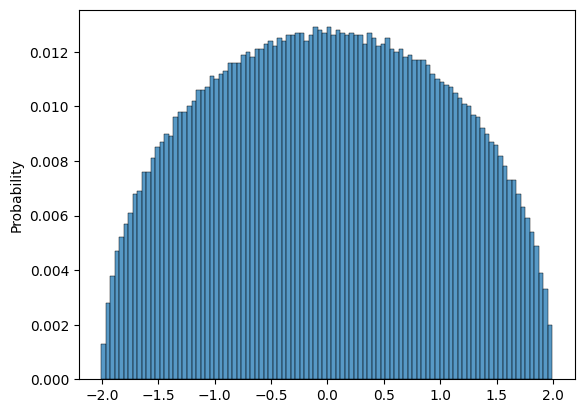

In [8]:
_ = gen_random_graph_two_diff_weights(lo_deg=100, hi_deg=500, n=10000, bins=100)

### Non-Example (Computational support for assumptions made in Theorem)
Low degree: `10`

High degree: `200`

Number of vertices: `10,000`

Note that $d_i$ could be $10$ and $10 \ngtr \sqrt{\frac{D}{n}}\approx\sqrt{105}\approx 10.2$.

Min eigenvalue:  -2.4374186366381903
Max eigenvalue:  2.433663777653284


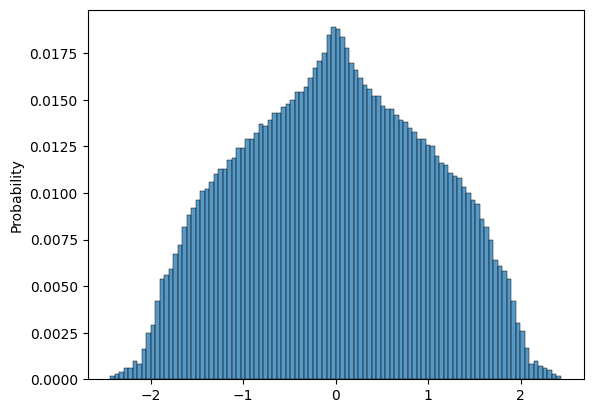

In [9]:
_ = gen_random_graph_two_diff_weights(lo_deg=10, hi_deg=200, n=10000, bins=100)